### Import and Define

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
resize = 1
plt.rcParams.update({
    "figure.figsize": (6.4*resize, 4.0*resize), # (6.4, 4.8)[4:3] -> (6.4, 4.0)[8:5]
    "font.sans-serif": ["Helvetica", "Nimbus Sans", "Arial", "DejaVu Sans"],
})

In [3]:
def restruct_array(content):
    # concatenate all np.ndarray to an array
    time = np.reshape((content.item()['push_time']-content.item()['start_time'])[1:, :], (1, -1))
    train_loss = np.reshape(content.item()['train_loss'][1:, :], (1, -1))
    train_acc = np.reshape(content.item()['train_acc'][1:, :], (1, -1))
    test_loss = np.reshape(content.item()['test_loss'][1:, :], (1, -1))
    test_acc = np.reshape(content.item()['test_acc'][1:, :], (1, -1))
    alles = np.concatenate((time, train_loss, train_acc, test_loss, test_acc))
    # sort the array by push time
    index = np.argsort(alles[0])
    alles = alles[:, index]
    # remove items unused
    index2 = alles[0, :] > 0
    alles = alles[:, index2]
    print(np.min(alles[3]), np.argmin(alles[3]))
    print(alles[3,-1], alles[4,-1])
    return alles

### Load Data

In [4]:
dir_path = '../ver_conf/scp/tf_npy'
base = '500'
extra = '1.05'
ls = [1, 2, 3, 4]
small = [83, 154, 205, 242]
dlr = []

dlr.append(restruct_array(np.load(f'./{dir_path}/tf_4GPU_{base}.npy', allow_pickle=True)))
for num1, num2 in zip(ls, small):
    dlr.append(restruct_array(np.load(f'./{dir_path}/tf_extra{extra}_{num1}s_{num2}_{base}.npy',
                                      allow_pickle=True)))

1.328341007232666 348
1.4287543296813965 0.6780999898910522
1.2031972408294678 352
1.2455271482467651 0.6786999702453613
1.1543279886245728 322
1.2903128862380981 0.7009999752044678
1.222001314163208 231
1.3718230724334717 0.7063999772071838
1.2940268516540527 339
1.3988595008850098 0.701200008392334


In [5]:
def get_csv():
    loss = []
    acc = []
    loss.append(np.arange(1, 561)/4)
    acc.append(np.arange(1, 561)/4)
    for i in dlr:
        loss.append(i[3])
        acc.append(i[4])
    loss = np.array(loss).T
    acc = np.array(acc).T
    np.savetxt('loss_105.csv', loss, delimiter=',')
    np.savetxt('acc_105.csv', acc, delimiter=',')

#get_csv()

### Plot

In [6]:
label = []

label.append(f'$n_S=0, B_L={base}$')
for num1, num2 in zip(ls, small):
    label.append(f'$n_S={num1}, B_S={num2}$')

#zorder=len(label)-i

In [7]:
#DPI = 300
SAVE = True
save_path = './figure'

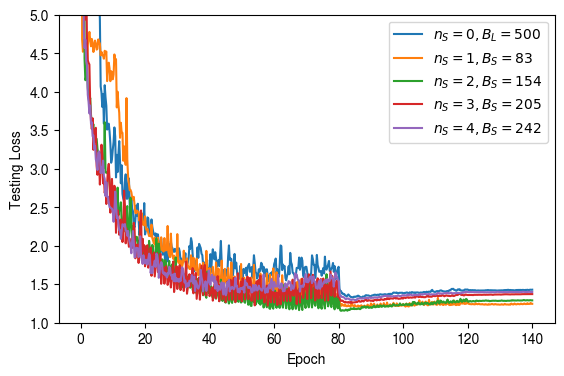

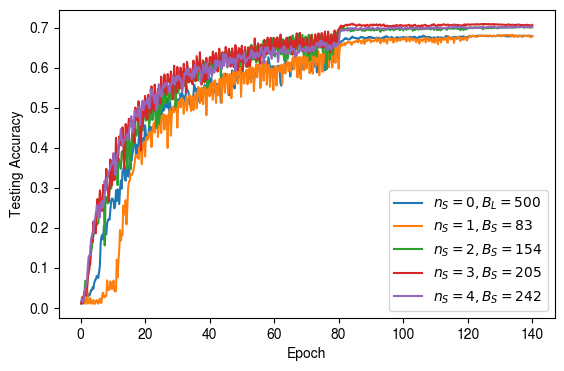

In [8]:
# loss/acc vs. epoch

## testing loss
plt.figure()#(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, 561)/4, dlr[i][3], label=label[i])#, linewidth=1)
plt.ylim(1, 5)
#plt.title('Decaying Learning Rate, Testing Loss vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
if SAVE:
    plt.savefig(f"{save_path}/loss_105.pdf", bbox_inches="tight")
else:
    plt.show()

## testing accuracy
plt.figure()#(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, 561)/4, dlr[i][4], label=label[i])#, linewidth=1)
#plt.title('Decaying Learning Rate, Testing Accuracy vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
if SAVE:
    plt.savefig(f"{save_path}/acc_105.pdf", bbox_inches="tight")
else:
    plt.show()

In [9]:
# loss/acc vs. time
if False:
    ## training loss
    plt.figure()#(dpi=DPI)
    for i in range(len(label)):
        plt.plot(dlr[i][0], dlr[i][1], label=label[i], linewidth=1)
    plt.title('Decaying Learning Rate, Training Loss vs. Time')
    plt.xlabel('Time (sec)')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.show()
    
    ## training accuracy
    plt.figure()#(dpi=DPI)
    for i in range(len(label)):
        plt.plot(dlr[i][0], dlr[i][2], label=label[i], linewidth=1)
    plt.title('Decaying Learning Rate, Training Accuracy vs. Time')
    plt.xlabel('Time (sec)')
    plt.ylabel('Training Accuracy')
    plt.legend()
    plt.show()
    
    ## testing loss
    plt.figure()#(dpi=DPI)
    for i in range(len(label)):
        plt.plot(dlr[i][0], dlr[i][3], label=label[i], linewidth=1)
    plt.ylim(1, 5)
    #plt.title('Decaying Learning Rate, Testing Loss vs. Time')
    plt.xlabel('Time (sec)')
    plt.ylabel('Testing Loss')
    plt.legend()
    plt.show()
    
    ## testing accuracy
    plt.figure()#(dpi=DPI)
    for i in range(len(label)):
        plt.plot(dlr[i][0], dlr[i][4], label=label[i], linewidth=1)
    #plt.title('Decaying Learning Rate, Testing Accuracy vs. Time')
    plt.xlabel('Time (sec)')
    plt.ylabel('Testing Accuracy')
    plt.legend()
    plt.show()